## Piotr Rzeźnik

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [4]:
using Polynomials

Polynomial(x)

In [16]:
function Legendre(k)
    if k==0
        return Polynomial([1])
    end
    if k==1
       return Polynomial([0,1])
    end
    return (2*k-1)/(k)*Legendre(1)*Legendre(k-1) - (k-1)/(k)*Legendre(k-2)
end

Legendre (generic function with 1 method)

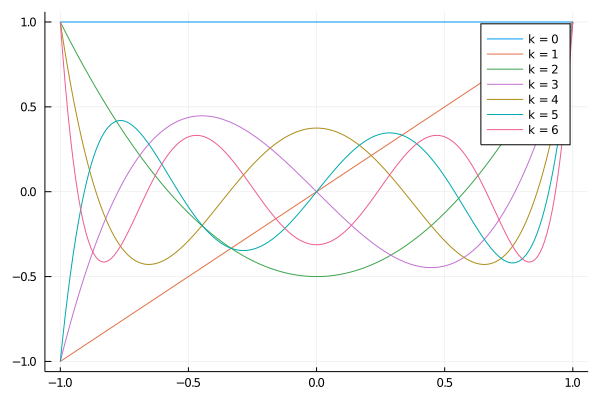

In [35]:
using Plots
xs =  -1:0.01:1
ys = [0(x) for x in xs]
plot = scatter(0, 0) 
for i in 0:6
    ys = [Legendre(i)(x) for x in xs]
    plot = plot!(xs, ys, label="k = $(i)") 
end
plot

In [52]:
# using Pkg
# Pkg.add("QuadGK")
using QuadGK
for i in 2:4
    print(roots(Legendre(i)))
    print(gauss(i)[1])
    print("\n\n")
end


[-0.5773502691896258, 0.5773502691896256][-0.5773502691896258, 0.5773502691896258]

[-0.7745966692414834, 0.7745966692414835, 0.0][-0.7745966692414834, 0.0, 0.7745966692414834]

[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531][-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



Z wykładu:

Odcięte ${x_{i}}$ n-punktowej kwadratury Gaussa z funkcją ważącą 
          $w(x)$ w $[a,b]$ są zerami wielomianu ortogonalnego
          $\varphi_{n}(x)$ dla tego samego przedziału i tej samej funkcji
          ważącej.

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [53]:
function integral_G(k, f)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp)) 
end

integral_G (generic function with 1 method)

In [99]:
for i in 2:20
    f(x) = x^i
    print("$(i).    ")
    print(integral_G(6, f))
    print("    ")
    print(integral_G(i,f))
    print("\n\n")
end

2.    0.6666666666666669    0.6666666666666667

3.    -2.7755575615628914e-17    0.0

4.    0.40000000000000013    0.4000000000000002

5.    0.0    0.0

6.    0.28571428571428586    0.28571428571428586

7.    0.0    1.3877787807814457e-17

8.    0.22222222222222238    0.22222222222222207

9.    0.0    0.0

10.    0.18181818181818193    0.18181818181818182

11.    0.0    6.938893903907228e-18

12.    0.1531080751859974    0.15384615384615397

13.    0.0    -1.3877787807814457e-17

14.    0.13094911560082764    0.13333333333333344

15.    0.0    0.0

16.    0.11290785467022466    0.11764705882352951

17.    0.0    -3.469446951953614e-18

18.    0.0977569586968132    0.10526315789473686

19.    0.0    3.469446951953614e-18

20.    0.08481758799621951    0.09523809523809533



Z wykładu:


1. możliwość doboru $a_{i}$ i $x_{i}$, $i=1,2,\ldots,n$ czyli $2n$ parametrów

1. za pomocą $2n$ parametrów można zdefiniować wielomian stopnia $2n-1$,

1. tak więc można uzyskać stopień dokładności $2n-1$ (w przypadku $n$-punktowej kwadratury)



### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [116]:
function integral_G_ab(k, f, a, b)
    (xp,w)=gauss(Float64,k)
    return sum(w .* f.((((b+a)/2).+((b-a)/2).*xp)).*((b-a)/2)) 
end

integral_G_ab (generic function with 1 method)

In [123]:
for i in 2:5
    f(x) = (i+1)*x^i
    print("$(i).    ")
    print(integral_G_ab(i,f,0, 10))
    print("\n\n")
end

2.    999.9999999999998

3.    9999.999999999996

4.    100000.00000000006

5.    1.0000000000000002e6



### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> quadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [131]:
f(x) = 3*x^2
quadgk(f, 0, 10)

(1000.0, 0.0)

In [132]:
g(x) = ((1/(sqrt(2*pi))*exp((-x^2)/2)))
quadgk(g, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [133]:
function integral_rectangle(k, f, a, b)
    h = (b-a)/k
    res = 0
    for i in 1:k-1
        res += f(a+i*h)*h
    end
    return res
end

integral_rectangle (generic function with 1 method)

In [138]:
f(x) = 3*x^2
integral_rectangle(100000, f, 0, 10)

999.9850000499987

In [145]:
f(x) = exp(x)
integral_rectangle(100000, f, 0, 1)

1.7182632370642

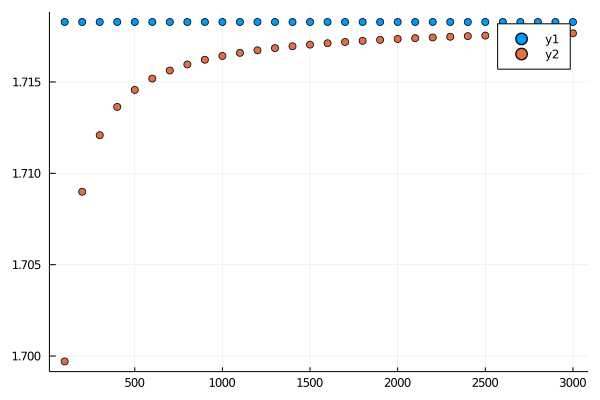

In [154]:
xs = 100:100:3000

f(x) = exp(x)
ys = [MathConstants.e-1 for _ in xs]
plot = scatter(xs, ys) 
ys = [integral_rectangle(x, f, 0, 1) for x in xs]
plot = scatter!(xs, ys) 

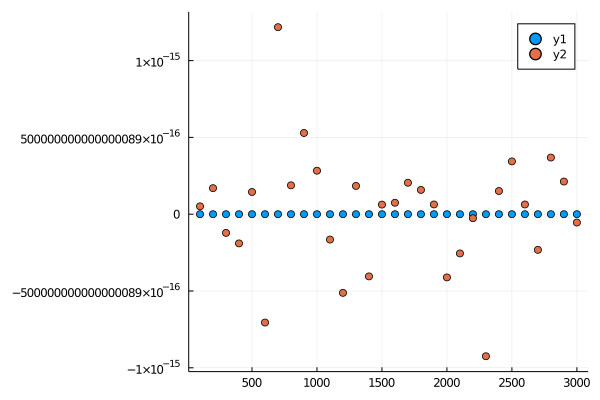

In [160]:
xs = 100:100:3000

f(x) = sin(x)
ys = [0 for _ in xs]
plot = scatter(xs, ys) 
ys = [integral_rectangle(x, f, 0, 2*pi) for x in xs]
plot = scatter!(xs, ys) 
